# Intro
- pyplot is a collection of command style functions that make matplotlib work like MATLAB. 
- Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

- In matplotlib.pyplot various states are preserved across function calls, so that it keeps track of things like the current figure and plotting area, and the plotting functions are directed to the current axes 

*The pyplot API is generally less-flexible than the object-oriented API. Most of the function calls you see here can also be called as }methods from an Axes object.*

General Plot

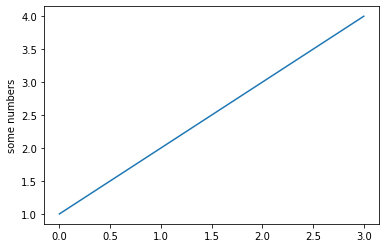

In [47]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

plot x versus y

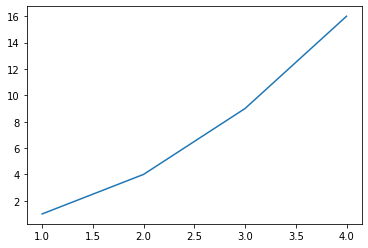

In [48]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

# plot symbols and/or colors

Format : plot(x, y, '<color>.<symbol>')
Example to plot blue dots
- plot(x, y, 'b.')
    
Symbols
- - , –, -., , . , , , o , ^ , v , < , > , s , + , x , D , d , 1 , 2 , 3 , 4 , h , H , p , | , _

Colors
- b, g, r, c, m, y, k, w

Plot with red circles

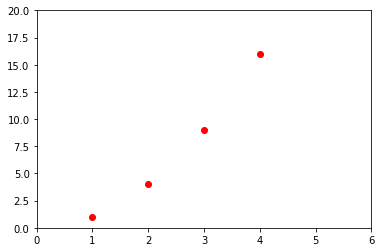

In [49]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

Example with red dashes, blue squares and green triangles

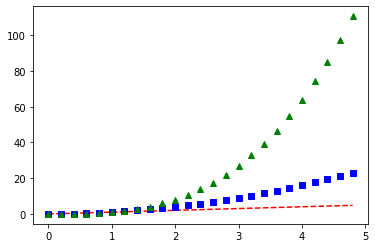

In [50]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

# Controlling line properties

Lines have many attributes that you can set: linewidth, dash style, antialiased, etc
There are several ways to set line properties

Using keyword arguments

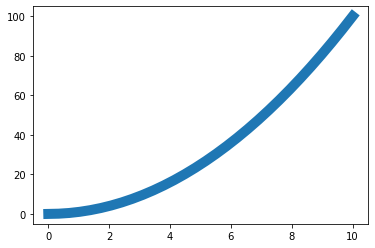

In [51]:
x = np.linspace(0, 10, 30)
y = x**2
plt.plot(x, y, linewidth=10.0)

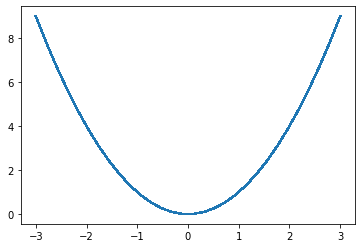

In [52]:
x = np.linspace(-3, 3, 30)
y = x**2
line, = plt.plot(x, y, '-')
line.set_antialiased(False) # turn off antialiasing

# setp() command.
The example below uses a MATLAB-style command to set multiple properties on a list of lines. setp works transparently with a list of objects or a single object. You can either use python keyword arguments or MATLAB-style string/value pairs

Python method

In [53]:
help(plt.setp)

Help on function setp in module matplotlib.pyplot:

setp(obj, *args, **kwargs)
    Set a property on an artist object.
    
    matplotlib supports the use of :func:`setp` ("set property") and
    :func:`getp` to set and get object properties, as well as to do
    introspection on the object.  For example, to set the linestyle of a
    line to be dashed, you can do::
    
      >>> line, = plot([1, 2, 3])
      >>> setp(line, linestyle='--')
    
    If you want to know the valid types of arguments, you can provide
    the name of the property you want to set without a value::
    
      >>> setp(line, 'linestyle')
          linestyle: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
    
    If you want to see all the properties that can be set, and their
    possible values, you can do::
    
      >>> setp(line)
          ... long output listing omitted
    
    By default `setp` prints to `sys.stdout`, but this can be modified using
    the *file* keyword-only argument::
    


  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  contains: unknown
  dash_capstyle: {'butt', 'round', 'projecting'}
  dash_joinstyle: {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`
  markeredgecolor or mec: color
  markeredgewidth or mew: float
  markerfacecolor or mfc: colo

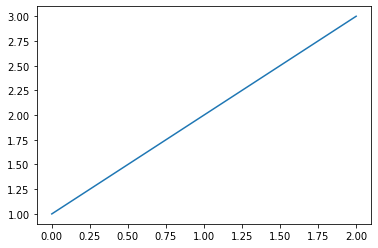

In [54]:
lines = plt.plot([1, 2, 3])
plt.setp(lines)

[None, None]

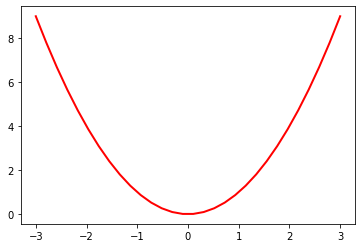

In [55]:
x = np.linspace(-3, 3, 30)
y = x**2
lines = plt.plot(x, y)
# use keyword args
plt.setp(lines, color='r', linewidth=2.0)

MATLAB-style string/value pairs method

[None, None]

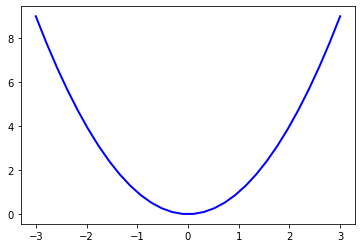

In [21]:
x = np.linspace(-3, 3, 30)
y = x**2
lines = plt.plot(x, y)
# MATLAB style string value pairs
plt.setp(lines, 'color', 'b', 'linewidth', 2.0)

# Plotting with keyword strings
There are some instances where you have data in a format that lets you access particular variables with strings. For example, with numpy.recarray or pandas.DataFrame.

Matplotlib allows you provide such an object with the data keyword argument. If provided, then you may generate plots with the strings corresponding to these variables.

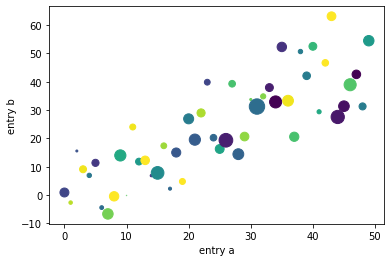

In [10]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

# Plotting with categorical variables

Matplotlib allows you to pass categorical variables directly to many plotting function

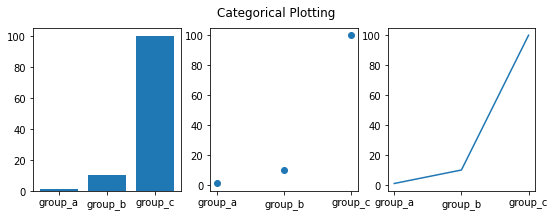

In [11]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

Display all the settable options

# Working with multiple figures and axes

MATLAB, and pyplot, have the concept of the current figure and the current axes. 
- All plotting commands apply to the current axes.
- gca() returns the current axes (a matplotlib.axes.Axes instance)
- gcf() returns the current figure (matplotlib.figure.Figure instance). Normally, you don't have to worry about this, because it is all taken care of behind the scenes. 

script to create two subplots
- 1st uses blue dots
- 2nd uses red dashes

script to create two subplots
- 1st uses blue dots
- 2nd uses red dashes

- The figure() command here is optional because figure(1) will be created by default, just as a subplot(111) will be created by default if you don't manually specify any axes. 
- The subplot() command specifies numrows, numcols, plot_number where plot_number ranges from 1 to numrows*numcols. 
- The commas in the subplot command are optional if numrows*numcols<10.
- subplot(211) is identical to subplot(2, 1, 1).


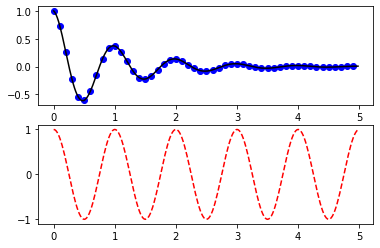

In [56]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

# plt.figure()
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

If you want to place an axes manually, i.e., not on a rectangular grid, use the axes() command, which allows you to specify the location as axes([left, bottom, width, height]) where all values are in fractional (0 to 1) coordinates

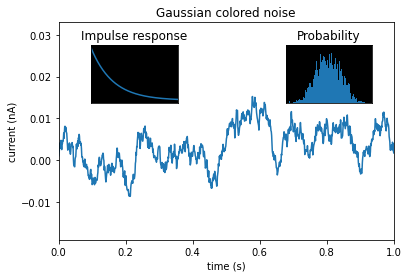

In [57]:
# Fixing random state for reproducibility
np.random.seed(19680801)


# create some data to use for the plot
dt = 0.001
t = np.arange(0.0, 10.0, dt)
r = np.exp(-t[:1000] / 0.05)  # impulse response
x = np.random.randn(len(t))
s = np.convolve(x, r)[:len(x)] * dt  # colored noise

fig, main_ax = plt.subplots()
main_ax.plot(t, s)
main_ax.set_xlim(0, 1)
main_ax.set_ylim(1.1 * np.min(s), 2 * np.max(s))
main_ax.set_xlabel('time (s)')
main_ax.set_ylabel('current (nA)')
main_ax.set_title('Gaussian colored noise')

# this is an inset axes over the main axes
right_inset_ax = fig.add_axes([.65, .6, .2, .2], facecolor='k')
right_inset_ax.hist(s, 400, density=True)
right_inset_ax.set_title('Probability')
right_inset_ax.set_xticks([])
right_inset_ax.set_yticks([])

# this is another inset axes over the main axes
left_inset_ax = fig.add_axes([.2, .6, .2, .2], facecolor='k')
left_inset_ax.plot(t[:len(r)], r)
left_inset_ax.set_title('Impulse response')
left_inset_ax.set_xlim(0, 0.2)
left_inset_ax.set_xticks([])
left_inset_ax.set_yticks([])

plt.show()


create multiple figures by using multiple figure() calls with an increasing figure number. Of course, each figure can contain as many axes and subplots as you need

e:\python3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


Text(0.5, 1.0, 'Easy as 1, 2, 3')

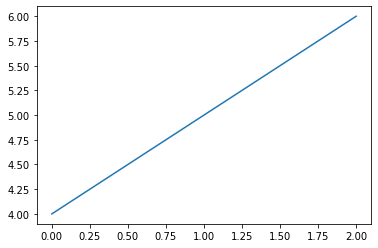

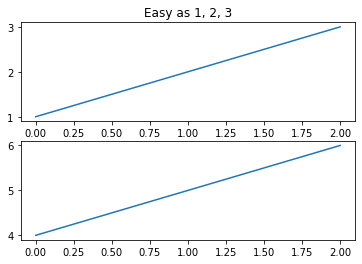

In [58]:
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot(111) by default

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title

# Working with text

- The text() command can be used to add text in an arbitrary location
- the xlabel(), ylabel() and title() are used to add text in the indicated locations

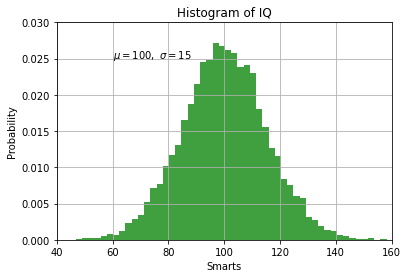

In [59]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

Complex example

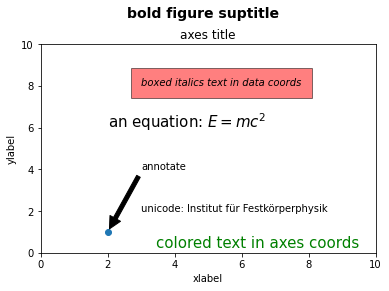

In [60]:
fig = plt.figure()
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)

ax.text(3, 2, 'unicode: Institut für Festkörperphysik')

ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)


ax.plot([2], [1], 'o')
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.axis([0, 10, 0, 10])

plt.show()


Annotating text
- A common use for text is to annotate some feature of the plot
- the annotate() method provides helper functionality to make annotations easier
- In an annotation, there are two points to consider: the location being annotated represented by the argument xy and the location of the text xytext. - Both of these arguments are (x,y) tuples.

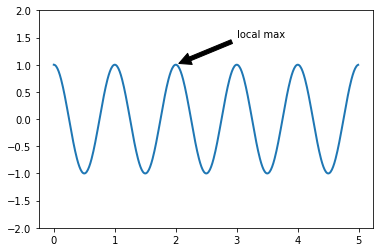

In [61]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.ylim(-2, 2)
plt.show()

Using the font library

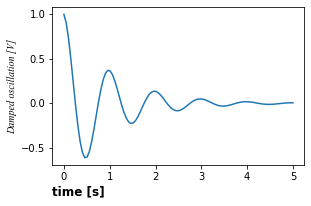

In [62]:
from matplotlib.font_manager import FontProperties

font = FontProperties()
font.set_family('serif')
font.set_name('Times New Roman')
font.set_style('italic')

x1 = np.linspace(0.0, 5.0, 100)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)

fig, ax = plt.subplots(figsize=(5, 3))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(x1, y1)
ax.set_xlabel('time [s]', horizontalalignment='left',
               position=(0., 1e6),
              fontsize='large', fontweight='bold')
ax.set_ylabel('Damped oscillation [V]', fontproperties=font)

plt.show()

use native TeX rendering in all text objects and have multiple lines

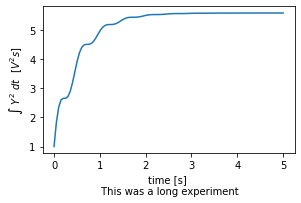

In [63]:
x1 = np.linspace(0.0, 5.0, 100)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
fig, ax = plt.subplots(figsize=(5, 3))
fig.subplots_adjust(bottom=0.2, left=0.2)
ax.plot(x1, np.cumsum(y1**2))
ax.set_xlabel('time [s] \n This was a long experiment')
ax.set_ylabel(r'$\int\ Y^2\ dt\ \ [V^2 s]$')
plt.show()

Titles

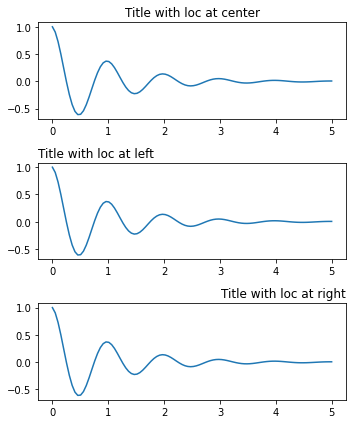

In [64]:
fig, axs = plt.subplots(3, 1, figsize=(5, 6), tight_layout=True)
locs = ['center', 'left', 'right']
for ax, loc in zip(axs, locs):
    ax.plot(x1, y1)
    ax.set_title('Title with loc at '+loc, loc=loc)
plt.show()

# Working with dates
Matplotlib can accept datetime.datetime and numpy.datetime64 objects as plotting arguments. 
- Dates and times require special formatting, which can often benefit from manual intervention. 
- In order to help, dates have special Locators and Formatters, defined in the matplotlib.dates module.

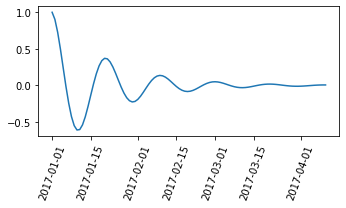

In [65]:
import datetime

fig, ax = plt.subplots(figsize=(5, 3), tight_layout=True)
base = datetime.datetime(2017, 1, 1, 0, 0, 1)
time = [base + datetime.timedelta(days=x) for x in range(len(y1))]

ax.plot(time, y1)
ax.tick_params(axis='x', rotation=70)
plt.show()

pass a format to matplotlib.dates.DateFormatter.
- note that the 29th and the next month are very close together. We can fix this by using the dates.DayLocator class, which allows us to specify a list of days of the month to use. 
- Similar formatters are listed in the matplotlib.dates module

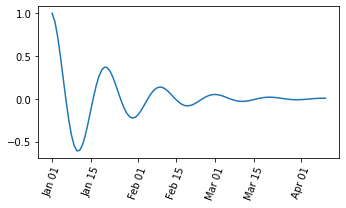

In [41]:
import matplotlib.dates as mdates

locator = mdates.DayLocator(bymonthday=[1, 15])
formatter = mdates.DateFormatter('%b %d')

fig, ax = plt.subplots(figsize=(5, 3), tight_layout=True)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.plot(time, y1)
ax.tick_params(axis='x', rotation=70)
plt.show()

# Logarithmic and other nonlinear axes

matplotlib.pyplot supports not only linear axis scales, but also logarithmic and logit scales. 
- commonly used if data spans many orders of magnitude. 
- Changing the scale of an axis is easy:
    plt.xscale('log')

An example of four plots with the same data and different scales for the y axis is shown below.

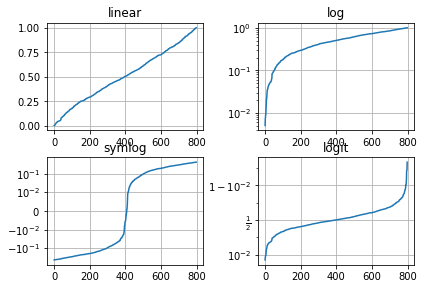

In [44]:
from matplotlib.ticker import NullFormatter  # useful for `logit` scale

# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure()

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)


# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)


# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthresh=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()